# Laboratorio 5 SDS - Analisis de paquetes y deteccion de trafico anomalo
## Ricardo Valenzuela
## Sara Zavala

### Importamos algunas librerias y vemos el dataset

In [147]:
import pandas as pd
import numpy as np

In [148]:
df = pd.read_csv("Train_data.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


### Exploramos los datos

Vemos que esta vez si contamos con una gran cantidad de variables, en total 41 donde solamente 4 son de tipo categorico y el resto cuantitativo

In [149]:
from quickda.explore_data import *
explore(df, method="summarize")

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
class,object,25192,0,0.0,2,anomaly,-,-,-,normal,-,-,-,-
count,int64,25192,0,0.0,466,1,2.0,14.0,144.0,511,84.59118,14.0,114.673451,1.503733
diff_srv_rate,float64,25192,0,0.0,79,0.0,0.0,0.0,0.06,1.0,0.062363,0.0,0.17855,4.417749
dst_bytes,int64,25192,0,0.0,3922,0,0.0,0.0,530.25,5151385,3491.847174,0.0,88830.71833,54.777576
dst_host_count,int64,25192,0,0.0,256,0,84.0,255.0,255.0,255,182.532074,255.0,98.993895,-0.843161
dst_host_diff_srv_rate,float64,25192,0,0.0,101,0.0,0.0,0.03,0.07,1.0,0.082539,0.03,0.187191,3.616185
dst_host_rerror_rate,float64,25192,0,0.0,101,0.0,0.0,0.0,0.0,1.0,0.1178,0.0,0.305869,2.363707
dst_host_same_src_port_rate,float64,25192,0,0.0,101,0.0,0.0,0.0,0.06,1.0,0.147453,0.0,0.308367,2.098527
dst_host_same_srv_rate,float64,25192,0,0.0,101,0.0,0.05,0.51,1.0,1.0,0.519791,0.51,0.448944,-0.004024
dst_host_serror_rate,float64,25192,0,0.0,100,0.0,0.0,0.0,1.0,1.0,0.2858,0.0,0.445316,0.958147


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

Tambien vemos que el datset no se euncuentra tan desbalanceado por lo que no se tomaran medidas

In [151]:
df["class"].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

En los datos estadisticos vemos anomalias con las variables src_bytes y dst_bytes, posiblemente hayan datos atipicos

{'whiskers': [<matplotlib.lines.Line2D at 0x17d1548d1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x17d1548d640>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d1547ceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x17d1548dbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d1548deb0>],
 'means': []}

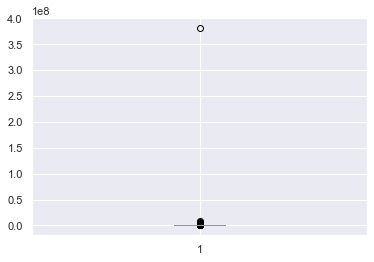

In [152]:
import matplotlib.pyplot as plt
# Creating plot
plt.boxplot(df["src_bytes"])

{'whiskers': [<matplotlib.lines.Line2D at 0x17d154f20a0>,
 'caps': [<matplotlib.lines.Line2D at 0x17d154f2640>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d154e5eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x17d154f2be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d154f2eb0>],
 'means': []}

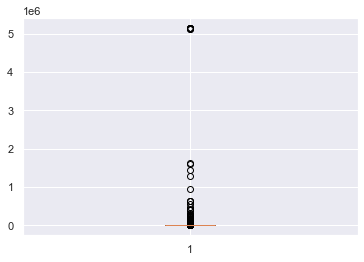

In [153]:
plt.boxplot(df["dst_bytes"])

Confirmamos presencia de datos atipicos en src_bytes y dst_bytes por lo que procedemos a quitarlos

In [154]:
#Antes de quitar outliners
len(df)

25192

In [155]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.0)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "src_bytes")
df = df[(df['src_bytes'] > lower) & (df['src_bytes'] < upper)]

upper, lower = outliers(df, "dst_bytes")
df = df[(df['dst_bytes'] > lower) & (df['dst_bytes'] < upper)]


In [156]:
#Despues de quitar outliners
len(df)

24127

{'whiskers': [<matplotlib.lines.Line2D at 0x17d15541640>,
 'caps': [<matplotlib.lines.Line2D at 0x17d15541be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d15541370>],
 'medians': [<matplotlib.lines.Line2D at 0x17d1554f1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d1554f490>],
 'means': []}

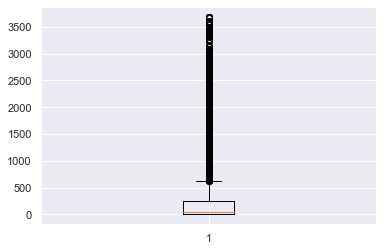

In [157]:
plt.boxplot(df["src_bytes"])

{'whiskers': [<matplotlib.lines.Line2D at 0x17d15b99b50>,
 'caps': [<matplotlib.lines.Line2D at 0x17d15ba6130>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d15b99880>],
 'medians': [<matplotlib.lines.Line2D at 0x17d15ba66d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d15ba69a0>],
 'means': []}

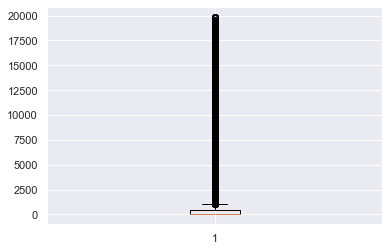

In [158]:
plt.boxplot(df["dst_bytes"])

Tras quitar outliners solamente perdimos alrededor de 1000 de los datos, lo que consideramos aceptable

Convertimos las te tipo categorico a cuantitativo con un identificador unico

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['service'] = le.fit_transform(df['service'])
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['flag'] = le.fit_transform(df['flag'])
df['class'] = le.fit_transform(df['class'])

In [160]:
df["class"].value_counts()

1    12611
0    11516
Name: class, dtype: int64

In [161]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


Vemos que el identificador 1 son los tados normales y el 0 las anomalias

### Separamos en test y train

In [162]:
features = df.loc[:, df.columns != 'class']
target = df["class"]

Como buena practica siempre escalamos los datos

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
features = pd.DataFrame(scaler.transform(features))
features

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.5,0.292308,0.9,0.133062,0.000000,0.0,0.0,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.0,0.630769,0.9,0.039566,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.5,0.707692,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.5,0.338462,0.9,0.062873,0.409966,0.0,0.0,0.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.5,0.338462,0.9,0.053930,0.021119,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24122,0.0,0.5,0.246154,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.027451,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
24123,0.0,0.5,0.292308,0.9,0.090515,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.152941,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
24124,0.0,0.5,0.707692,0.1,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.050980,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
24125,0.0,0.5,0.584615,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.078431,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00
